# Installing packages

In [ ]:
#!pip install easyocr
#!pip install torch torchvision torchaudio
#!pip install ocrmypdf
#!pip uninstall imgaug
#!pip install imgaug==0.4.0
#!pip install pdf2image
!apt-get install poppler-utils 
!apt-get install poppler-utils -qq
!pip install PyPDF2
!pip install -q PyMuPDF pdf2image fitz tabula camelot-py[cv]
!$ pip install camelot-py[plot]

# Importing Libraries & mounting drive

In [2]:
import pandas as pd, numpy as np, gspread
import tabula 
import camelot

#rom pdf2image import convert_from_path
from matplotlib import pyplot as plt
from google.colab import auth
from datetime import datetime
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
from google.colab import drive
#drive.mount('/content/drive')
from gspread_dataframe import set_with_dataframe

# Functions

In [21]:
def legacy(df,file_name): ## create a legacy file
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  sh = gc.create(file_name)
  worksheet = gc.open(file_name).sheet1
  set_with_dataframe(worksheet,pd.DataFrame.from_records(df),resize=True)

# File Reading

In [3]:
banorte_path= "/content/drive/MyDrive/hackatonBBVA2021/estadosFinancieros/Banorte/"

# 2T21 Reporte Trimestral - Estado de resultados p.33

In [4]:
banorte_file = "2T21"
filename = banorte_path+banorte_file+".pdf"

In [162]:
read_table = camelot.read_pdf(filename,flavor="stream",pages='33',edge_tol=200,row_tol=7)

In [163]:
df = read_table[0].df

In [164]:
df.columns = df.iloc[0]
df = df[1:]
df = df.drop([1,8,12,15,42,48,51,56,65,72])

In [165]:
df

,Estado de Resultados-GFNorte,1T20,2T20,3T20,4T20,1T21,2T21
2,Ingresos por Intereses,"36,519","32,350","32,987","30,296","32,142","31,016"
3,Gastos por Intereses,"14,237","13,032","10,149","9,324","9,405","9,260"
4,Comisiones cobradas,360,346,354,380,352,362
5,Comisiones Pagadas,291,270,281,314,314,313
6,Ingresos de Intereses Netos de intereses y \nc...,"22,351","19,395","22,911","21,038","22,775","21,806"
7,Ingresos por Primas (Neto),"12,155","8,118","7,385","9,192","15,340","8,602"
9,Incremento neto de reservas técnicas,"7,946","1,216","4,262","4,368","11,016","4,983"
10,"Siniestros, Reclamaciones y Otras Obligaciones","4,592","5,613","5,433","6,281","7,097","5,777"
11,Ingresos de Intereses Netos antes de Estim .,"21,968","20,683","20,601","19,580","20,002","19,649"
13,Provisiones Prev. para Riesgos crediticios,"4,344","8,456","3,138","5,993","3,215","2,765"


In [25]:
legacy(df, 'Estado de Resultados_2T21')

There is still missing smt in row 41 and 48 'cuz the /n is supposed to be a new row + reset indexes + fill blanks with zeros

# 2T21 Reporte Trimestral - Balance General p.34 activos

In [71]:
read_table = camelot.read_pdf(filename,flavor="stream",pages='34',edge_tol=200,row_tol=7)

In [104]:
df = read_table[0].df

In [105]:
df.columns = df.iloc[0]
df = df[1:]
df = df.drop([1,2,26,27,38,39,48,52])

In [106]:
df.reset_index(drop=True, inplace=True)
df.iloc[54,0] = df.iloc[53,0]
df = df.drop(53)

In [108]:
legacy(df, 'Balance General_2T21')

Fully clean

# 2T21 Reporte Trimestral - Balance General_2 p.35 pasivos

In [132]:
read_table = camelot.read_pdf(filename,flavor="stream",pages='35',edge_tol=225,row_tol=7)

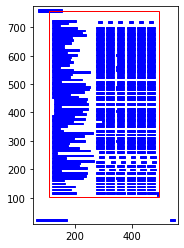

In [139]:
camelot.plot(read_table[0], kind='contour').show()

In [141]:
df = read_table[0].df

In [142]:
df.columns = df.iloc[1]
df = df[4:]
df = df.drop([35,36,45,48,55,57,59,62,65])

In [144]:
df.reset_index(drop=True, inplace=True)

In [146]:
legacy(df, 'Balance General_2T21_2')

# 2T21 Reporte Trimestral - Cuentas de orden p.36

In [147]:
read_table = camelot.read_pdf(filename,flavor="stream",pages='36',edge_tol=225,row_tol=7)

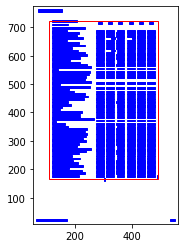

In [148]:
camelot.plot(read_table[0], kind='contour').show()

In [156]:
df = read_table[0].df

In [157]:
df.columns = df.iloc[0]
df = df[3:]
df = df.drop([19,25,27,40])

In [158]:
df.reset_index(drop=True, inplace=True)

In [161]:
legacy(df, 'Cuentas orden_2T21')

#File reading

In [66]:
banorte_path= "/content/drive/MyDrive/hackatonBBVA2021/estadosFinancieros/Banorte/"
banorte_file = "1T20_Administracion de Riesgos"
filename = banorte_path+banorte_file+".pdf"

#Reporte de administracion de riesgos

In [67]:
read_table = camelot.read_pdf(filename,flavor="stream",pages='23',edge_tol=20,row_tol=10)

In [69]:
read_table[0].df

,0,1,2,3
0,,4.3. Coeficiente de Cobertura de Liquidez,,
1,E,l CCL permite cuantificar el Riesgo de Liquide...,,
2,"los próximos 30 días, bajo supuestos de un esc...",,,
3,E,l CCL es un indicador que debe interpretarse c...,,
4,"de corto plazo, bajo un escenario extremo, hac...",,,
5,L,a siguiente tabla presenta la evolución promed...,,
6,,,Banco y Sofomes,
7,,Componentes del CCL,Importe Sin,Importe
8,,(Millones de pesos),Ponderar,Ponderado
9,,,(Promedio),(Promedio)


TESTING